In [9]:
import pickle
import boris_extraction as boris
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import sem
from itertools import combinations
import pandas as pd
import os
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))

In [2]:
ex_boris = pd.read_csv(r'C:\Users\megha\Documents\Padilla-Coreano\homecage_social_ephys_vids\pilot2\boris\cups\21_cups_p4.csv')

In [3]:
ex_boris_22 = pd.read_csv(r"C:\Users\megha\Documents\Padilla-Coreano\homecage_social_ephys_vids\pilot2\boris\cups\22_cups_p4.csv")

In [148]:

ex_1 = pd.read_csv(r'C:\Users\megha\Documents\Padilla-Coreano\homecage_social_ephys_vids\pilot2\boris\cups\24_cups_p4_aggregated.csv')

ex_2 = pd.read_csv(r'C:\Users\megha\Documents\Padilla-Coreano\homecage_social_ephys_vids\pilot2\boris\cups\31_cups_4_aggregated.csv')

ex_1[(ex_1['Behavior'] == 'mouse in'
         ) | (ex_1['Behavior'] == 'mouse out'
        )]['Subject']

110    No focal subject
232    No focal subject
333    No focal subject
334    No focal subject
335    No focal subject
Name: Subject, dtype: object

In [149]:
ex_boris['Behavior'].unique()
ex_boris_22['Behavior'].unique()

array(['sniff cup 2', 'sniff cup 1', 'sniff cup 4', 'sniff cup 3',
       'chew cup 3', 'chew cup 1', 'chew cup 4', 'chew cup 2', 'mouse in',
       'mouse out'], dtype=object)

In [150]:
filtered = ex_boris[(ex_boris['Behavior'] == 'mouse in') | (ex_boris['Behavior'] == 'mouse out')]['Start (s)'].values
filtered

array([ 616.067, 1201.533, 1879.6  ])

In [151]:
filtered = ex_boris[ex_boris['Behavior'] == 'mouse in']
filtered

,Observation id,Observation date,Description,Observation type,Source,Time offset (s),Coding duration,Media duration (s),FPS (frame/s),Subject,...,Start (s),Stop (s),Duration (s),Media file name,Image index start,Image index stop,Image file path start,Image file path stop,Comment start,Comment stop
110,21_cups_p4,2024-10-20 17:14:20.423,observation for 2.1 cups p4 Anastasia Achziger,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,2520.733,2520.8,15.0,No focal subject,...,616.067,616.067,NaN,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/21_cu...,9241,9241.0,NaN,NaN,NaN,NaN
294,21_cups_p4,2024-10-20 17:14:20.423,observation for 2.1 cups p4 Anastasia Achziger,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,2520.733,2520.8,15.0,No focal subject,...,1879.600,1879.600,NaN,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/21_cu...,28194,28194.0,NaN,NaN,NaN,NaN


In [152]:
filtered = ex_boris_22[ex_boris_22['Behavior'] == 'mouse in']
filtered

,Observation id,Observation date,Description,Observation type,Source,Time offset (s),Coding duration,Media duration (s),FPS (frame/s),Subject,...,Start (s),Stop (s),Duration (s),Media file name,Image index start,Image index stop,Image file path start,Image file path stop,Comment start,Comment stop
91,22_cups_p4,2024-10-20 12:45:57.394,observation for 2.2 cups p4 Anastasia Achziger,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,2604.867,2604.933,15.0,No focal subject,...,661.200,661.200,NaN,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/22_cu...,9918,9918.0,NaN,NaN,NaN,NaN
267,22_cups_p4,2024-10-20 12:45:57.394,observation for 2.2 cups p4 Anastasia Achziger,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,2604.867,2604.933,15.0,No focal subject,...,1972.667,1972.667,NaN,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/22_cu...,29590,29590.0,NaN,NaN,NaN,NaN


In [153]:
filtered = ex_boris[ex_boris['Behavior'] == 'mouse out']
filtered

,Observation id,Observation date,Description,Observation type,Source,Time offset (s),Coding duration,Media duration (s),FPS (frame/s),Subject,...,Start (s),Stop (s),Duration (s),Media file name,Image index start,Image index stop,Image file path start,Image file path stop,Comment start,Comment stop
206,21_cups_p4,2024-10-20 17:14:20.423,observation for 2.1 cups p4 Anastasia Achziger,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,2520.733,2520.8,15.0,No focal subject,...,1201.533,1201.533,NaN,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/21_cu...,18023,18023.0,NaN,NaN,NaN,NaN


In [154]:
filtered = ex_boris_22[ex_boris_22['Behavior'] == 'mouse out']
filtered

,Observation id,Observation date,Description,Observation type,Source,Time offset (s),Coding duration,Media duration (s),FPS (frame/s),Subject,...,Start (s),Stop (s),Duration (s),Media file name,Image index start,Image index stop,Image file path start,Image file path stop,Comment start,Comment stop
167,22_cups_p4,2024-10-20 12:45:57.394,observation for 2.2 cups p4 Anastasia Achziger,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,2604.867,2604.933,15.0,No focal subject,...,1259.333,1259.333,NaN,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/22_cu...,18890,18890.0,NaN,NaN,NaN,NaN


In [4]:
cup_dict = {'4.4':['cagemate', 'novel', 'familiar', 'empty'],
            '1.3': ['empty', 'cagemate', 'novel', 'familiar'],
            '2.1': ['familiar', 'empty', 'cagemate', 'novel'],
            '3.1': ['novel', 'familiar', 'empty', 'cagemate'],
            '1.1': ['cagemate', 'novel', 'familiar', 'empty'],
            '2.2': ['empty', 'cagemate', 'novel', 'familiar'],
            '2.3': ['familiar', 'empty', 'cagemate', 'novel'],
            '3.2': ['novel', 'familiar', 'empty', 'cagemate'],
            '2.4': ['familiar', 'empty', 'cagemate', 'novel'],
            '4.1': ['cagemate', 'novel', 'familiar', 'empty']}

color_dict = {'4.4':['orange', 'blue', 'green', 'pink'],
            '1.3': ['green', 'pink', 'orange', 'blue'],
            '2.1': ['orange', 'blue', 'green', 'pink'],
            '3.1': ['green', 'pink', 'orange', 'blue'],
            '1.1':['orange', 'blue', 'green', 'pink'],
            '2.2': ['green', 'pink', 'orange', 'blue'],
            '2.3': ['orange', 'blue', 'green', 'pink'],
            '3.2': ['green', 'pink', 'orange', 'blue'],
            '2.4': ['orange', 'blue', 'green', 'pink'],
            '4.1': ['orange', 'blue', 'green', 'pink']}



In [8]:

folder_path = r"C:\Users\megha\Documents\Padilla-Coreano\homecage_social_ephys_vids\pilot2\boris\cups"
behavior_dicts = {}
# Loop through each file in the folder
for filename in os.listdir(folder_path):
    boris_excel = os.path.join(folder_path, filename)
    ex_boris = pd.read_csv(boris_excel)
    times = ex_boris[
        (ex_boris['Behavior'] == 'mouse in'
         ) | (ex_boris['Behavior'] == 'mouse out'
        )]['Start (s)'].values
    subject = filename.split("_")[0]
    subject = str(float(subject)/10)
    agentorder = cup_dict[subject]
    fam_behaviors = ["sniff cup " + str(agentorder.index('familiar') + 1),
                     "chew cup " + str(agentorder.index('familiar') + 1)]
    cagemate_behaviors = ["sniff cup " + str(agentorder.index('cagemate') + 1),
                     "chew cup " + str(agentorder.index('cagemate') + 1)]
    novel_behaviors = ["sniff cup " + str(agentorder.index('novel')+ 1),
                     "chew cup " + str(agentorder.index('novel')+ 1)]
    empty_behaviors = ["sniff cup " + str(agentorder.index('empty')+ 1),
                     "chew cup " + str(agentorder.index('empty')+ 1)]
    baseline_behaviors = ['sniff cup 1', 'chew cup 1',
                          'sniff cup 2', 'chew cup 2',
                          'sniff cup 3', 'chew cup 3',
                          'sniff cup 4', 'chew cup 4']
    fam_empty_behaviors = [item for item in baseline_behaviors if item not in fam_behaviors]
    baseline_df = ex_boris[ex_boris["Start (s)"] < times[0]]
    familiarization_df = ex_boris[(ex_boris["Start (s)"] > times[0]) &
                                  (ex_boris['Start (s)'] < times[1])]
    iti_df = ex_boris[(ex_boris["Start (s)"] > times[1]) &
                                  (ex_boris['Start (s)'] < times[2])]
    last10min_df = ex_boris[ex_boris["Start (s)"] > times[-1]]
    novel_array = boris.get_behavior_bouts(last10min_df, ["subject"], novel_behaviors)
    empty_array = boris.get_behavior_bouts(last10min_df, ["subject"], empty_behaviors)
    cagemate_array = boris.get_behavior_bouts(last10min_df, ["subject"], cagemate_behaviors)
    fam_array = boris.get_behavior_bouts(last10min_df, ["subject"], fam_behaviors)
    acq_array = boris.get_behavior_bouts(familiarization_df, ["subject"], fam_behaviors)
    empty_acq_array = boris.get_behavior_bouts(familiarization_df, ["subject"],
                                               fam_empty_behaviors)
    cup1_array = boris.get_behavior_bouts(baseline_df, ['subject'], 
                                          ['sniff cup 1', 'chew cup 1'])
    cup2_array = boris.get_behavior_bouts(baseline_df, ['subject'], 
                                          ['sniff cup 2', 'chew cup 2'])
    cup3_array = boris.get_behavior_bouts(baseline_df, ['subject'], 
                                          ['sniff cup 3', 'chew cup 3'])
    cup4_array = boris.get_behavior_bouts(baseline_df, ['subject'], 
                                          ['sniff cup 4', 'chew cup 4'])
    behavior_dicts[subject] = {'cup 1': cup1_array,
                               'cup 2': cup2_array,
                               'cup 3': cup3_array,
                               'cup 4': cup4_array,
                               'acquisition': acq_array,
                               'empty acquisition': empty_acq_array,
                               'familiar': fam_array,
                               'novel': novel_array,
                               'cagemate':cagemate_array,
                               'empty': empty_array}
                     
    pickle_this(behavior_dicts, "cups_behavior_dicts.pkl")

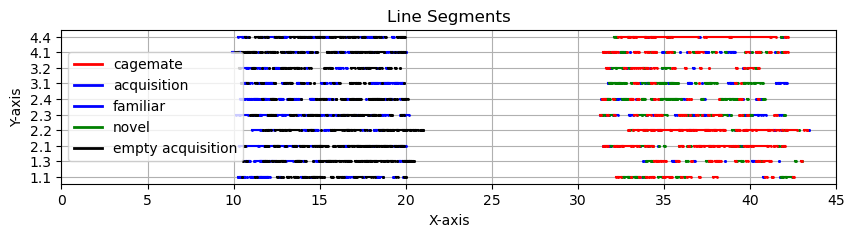

In [6]:
color_dict = {'cagemate': 'r', 'acquisition': 'b', 'familiar': 'b', 'novel': 'g',
              'empty acquisition' : 'k'}
recording_number = 0
plt.figure(figsize = (10,2))
labels = []
for name, recording in behavior_dicts.items():
    labels.append(name)
    for event, snippets in recording.items():
        if (event =='cagemate'
            ) | (event == 'familiar'
                 ) | (event == 'novel'
                      ) | (event == 'acquisition'
                    ) | (event == 'empty acquisition'):
            for i in range(len(snippets)):
                y = [recording_number,recording_number]
                x = snippets[i]/1000/60
            # Plot the line segments
                plt.plot(x, y, marker='o', linestyle='-', c= color_dict[event], markersize = 1)
    recording_number += .5
# Optionally, you can add labels, title, etc.
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.yticks(ticks=np.arange(len(labels))/2, labels=labels)
plt.title('Line Segments')
legend_labels = [plt.Line2D([0], [0], color=color_dict[label], lw=2, label=label) for label in color_dict]
plt.legend(handles=legend_labels)
plt.grid(True)
plt.xlim([0,45])
plt.show()

In [7]:
event_info = {}
sniff_itis = []
j = 0
total_sniffs = 0
subject_info = {}
for subject, behavior_dict in behavior_dicts.items():
    event_dict_keys = behavior_dict.keys()
    for event, events in behavior_dict.items():
        no_events = events.shape[0]
        sniff_length = 0
        for i in range(len(events)):
            sniff_length_temp = events[i][1] - events[i][0]
            sniff_length = sniff_length + sniff_length_temp
            total_sniffs = total_sniffs + 1
            try:
                sniff_iti = events[i+1][0] - events[i][1]
                sniff_itis.append(sniff_iti)
            except IndexError:
                pass
        total_sniff_time = sniff_length/1000
        try:
            avg_event = sniff_length/no_events/1000
        except ZeroDivisionError:
            avg_event = 0
        if subject in event_info.keys():
            dict_event = event_info[subject]
            dict_event[event] =  {'no_events': no_events, 'avg event': avg_event, 'total time': total_sniff_time}
            event_info[subject] =  dict_event
        else:
            event_info[subject] = {event: {'no_events': no_events, 'avg event': avg_event,'total time': total_sniff_time }}
    j += 1
sniff_itis = np.array(sniff_itis)/1000
sniff_itis 
overlapping_sniffs = 0 
for i in range(len(sniff_itis)):
    if sniff_itis[i] < 1:
        overlapping_sniffs = overlapping_sniffs + 1
print(overlapping_sniffs) # was 54 with old thresholding for less than 2, 142 for 5
print(total_sniffs)
print(event_info)

876
2862
{'1.1': {'cup 1': {'no_events': 17, 'avg event': 2.898, 'total time': 49.266}, 'cup 2': {'no_events': 20, 'avg event': 3.13675, 'total time': 62.735}, 'cup 3': {'no_events': 33, 'avg event': 2.337363636363638, 'total time': 77.13300000000005}, 'cup 4': {'no_events': 40, 'avg event': 2.6733249999999997, 'total time': 106.933}, 'acquisition': {'no_events': 47, 'avg event': 2.8836382978723405, 'total time': 135.531}, 'empty acquisition': {'no_events': 42, 'avg event': 3.5936190476190477, 'total time': 150.932}, 'familiar': {'no_events': 3, 'avg event': 2.4666666666666663, 'total time': 7.4}, 'novel': {'no_events': 18, 'avg event': 6.714888888888889, 'total time': 120.868}, 'cagemate': {'no_events': 20, 'avg event': 5.1133500000000005, 'total time': 102.267}, 'empty': {'no_events': 16, 'avg event': 2.6790625000000143, 'total time': 42.86500000000023}}, '1.3': {'cup 1': {'no_events': 27, 'avg event': 3.0293703703703705, 'total time': 81.793}, 'cup 2': {'no_events': 27, 'avg event':

In [159]:
data_points = []
subjects = []
behaviors = []
for subject, dict in event_info.items():
    #iterating through subject
    event_list = []
    subjects.append(subject)
    for event, times in dict.items():
        #iterating through event
        event_list.append(times['total time'])
        behaviors.append(event)
    data_points.append(event_list)
data_points = np.array(data_points).T
print(subjects)
behaviors = behaviors[4:10]
print(behaviors)
print(data_points.shape)
data_points = data_points[4:10,:] 
print(data_points.shape)

['1.1', '1.3', '2.1', '2.2', '2.3', '2.4', '3.1', '3.2', '4.1', '4.4']
['acquisition', 'empty acquisition', 'familiar', 'novel', 'cagemate', 'empty']
(10, 10)
(6, 10)


In [160]:
event_overview = pd.concat({k: pd.DataFrame(v) for k, v in event_info.items()}, axis=0)
event_overview = event_overview.reset_index()
event_dict_keys
event_overview
event_temp = event_overview.drop('level_0', axis = 1)
event_overview_averages = event_temp.groupby('level_1').mean()
event_overview_averages

,cup 1,cup 2,cup 3,cup 4,acquisition,empty acquisition,familiar,novel,cagemate,empty
level_1,,,,,,,,,,
avg event,2.899749,2.771093,3.229477,3.430529,4.965829,3.174697,2.228736,4.675568,6.195815,2.782732
no_events,24.500000,24.900000,30.900000,30.300000,34.900000,60.000000,14.300000,23.300000,29.500000,13.600000
total time,67.897800,69.388200,97.997200,103.123500,141.404300,189.446400,36.678200,90.459300,192.539300,42.678500


In [167]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_cup_time_averages = {}
for event in event_dict_keys:
    if 'cup' in event:
        avg_event = event_total_time[event].mean()
        event_cup_time_averages[event] = avg_event
event_cup_time_averages

{'cup 1': 67.89780000000005,
 'cup 2': 69.38819999999998,
 'cup 3': 97.99720000000002,
 'cup 4': 103.1235}

In [168]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_agent_time_averages = {}
avg_events = []
sem_events = []
for event in event_dict_keys:
    if 'cup' not in event:
        avg_event = event_total_time[event].mean()
        sem_event = sem(event_total_time[event])
        event_agent_time_averages[event] = avg_event
        avg_events.append(avg_event)
        sem_events.append(sem_event)
avg_events = np.array(avg_events)
sem_events = np.array(sem_events)
event_agent_time_averages

{'acquisition': 141.40429999999998,
 'empty acquisition': 189.44640000000007,
 'familiar': 36.6782,
 'novel': 90.4592999999999,
 'cagemate': 192.53930000000005,
 'empty': 42.67850000000003}

['1.1', '1.3', '2.1', '2.2', '2.3', '2.4', '3.1', '3.2', '4.1', '4.4']
acquisition
[135.531 103.732 187.465 113.262 241.457 130.54  152.335 113.996  76.86
 158.865]
empty acquisition
[150.932 254.792 251.925 315.384 149.859 129.401  62.463 133.398 208.116
 238.194]
familiar
[  7.4    25.265  16.33   15.134 130.797  36.668  77.932   9.665  40.926
   6.665]
novel
[120.868  61.466  55.867  35.533 140.2   154.866 188.134  71.333  56.994
  19.332]
cagemate
[102.267 105.463 353.388 447.237 122.191  36.335  28.734  87.866 128.925
 512.987]
empty
[42.865 98.132 69.266 26.999 96.397  5.266 24.599  1.066 55.863  6.332]


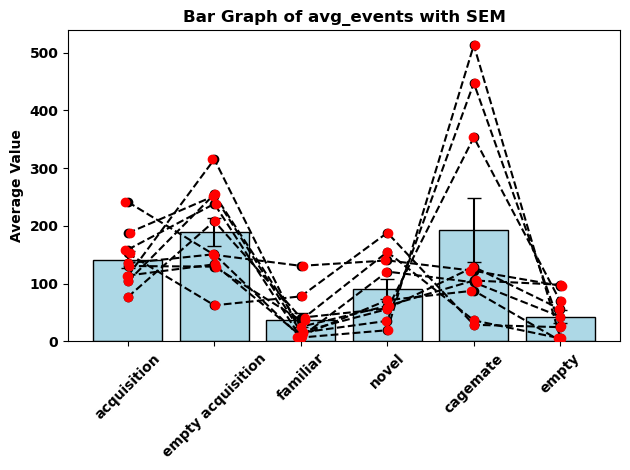

In [169]:
print(subjects)
x = np.arange(len(avg_events))
labels = event_agent_time_averages.keys()
# Create the bar plot
plt.bar(x, avg_events, yerr=sem_events, capsize=5, color='lightblue', edgecolor='black')
for i, group_data in enumerate(data_points):
    print(behaviors[i])
    print(data_points[i])
    # Spread the points a little horizontally to avoid overlap (add a small random jitter)
    jitter = np.random.normal(0, 0.02, size=len(group_data))
    plt.scatter([i + jitter_val for jitter_val in jitter], group_data, color='red', zorder=5)
for j in range(len(data_points[0])):  # Assuming all groups have the same number of data points
    x_vals = np.arange(len(data_points))  # X positions for all groups
    y_vals = [data_points[i][j] for i in range(len(data_points))]  # Y values for the same index
    plt.plot(x_vals, y_vals, color='black', linestyle='--', marker='o', zorder=4)

# Add labels and title
plt.xticks(x, labels, rotation = 45)
plt.ylabel('Average Value')
plt.title('Bar Graph of avg_events with SEM')

# Show the plot
plt.tight_layout()
plt.show()



In [164]:
avg_events = avg_events[np.array([3,2,4])]

sem_events = sem_events[np.array([3,2,4])]

Text(0.5, 1.0, 'Constrained')

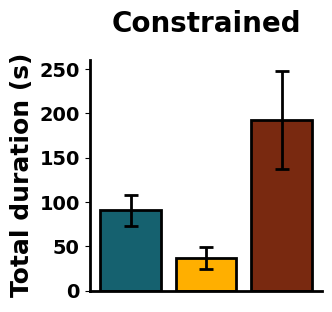

In [165]:
plt.rcParams['font.weight'] = 'bold'  # Set font weight to bold (not bold)
plt.rcParams['axes.titleweight'] = 'bold'  # Set axis title font weight to bold
plt.rcParams['axes.labelweight'] = 'bold'  # Set axis label font weight to bold

color_id_dict = {'novel': hex_2_rgb('#15616F'),  
                'short-term familiar\n(exposure 2)': (1.0, 0.6862745098039216, 0.0),
                'long-term familiar': hex_2_rgb('#792910')
                }
hatches = ['','','']  
plt.figure(figsize= (3,3))           
plt.bar(color_id_dict.keys(), avg_events, yerr = sem_events,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'], linewidth = 2,
            capsize = 5, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
plt.ylabel('Total duration (s)', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Constrained', fontsize = 20, pad = 20)